# Finite Automata and Neural Networks (optional)

As mentioned above, finite automata have a common origin with neural networks, which were introduced in 1943 and were later applied to artificial intelligence. Their popularity rose and fell several times but are currently very much in vogue.

I'd like to present a variant of the original neural networks, designed to highlight their similarity with finite automata. We can picture a neural network (NN) as a graph, like this:

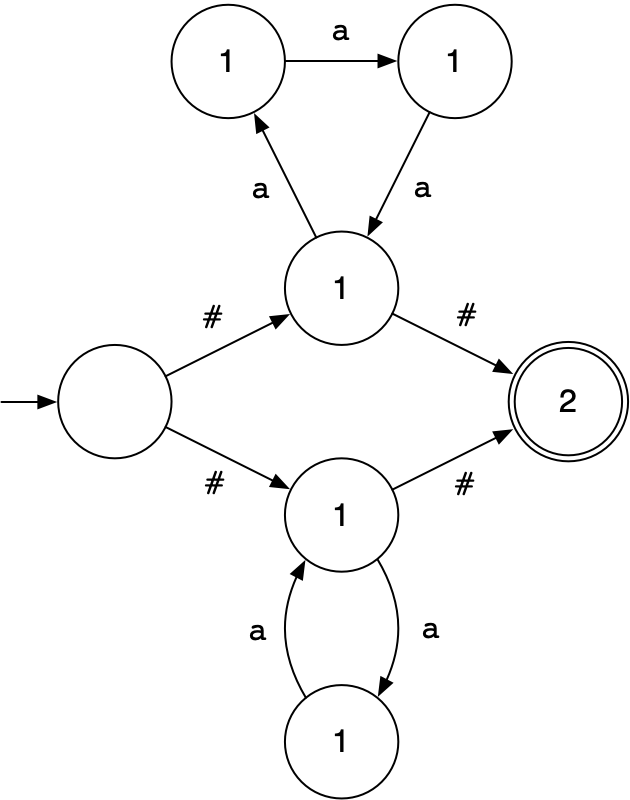

If it were not for the numbers inside the states, this would look like an NFA recognizing the language $\{\#\texttt{a}^n\# \mid \text{$n$ is a multiple of 2 or 3}\}$. At any time while reading $\texttt{a}$'s, exactly one state in the 2-cycle and exactly one state in the 3-cycle is "on"; the rest are "off." (Note the shift in terminology: we used to say that a machine is "in" a state, but now we say that the state is "on." The meaning is the same, but the "on/off" terminology will make what comes next clearer.) Now imagine that the machine reads $\#$. If either of the predecessors of the accept state were on, then the accept state will be on. So, as an NFA, this machine would accept strings where the number of $\texttt{a}$'s is either a multiple of 2 or 3.

But the number inside each state is important. It is an *activation threshold* which says how many incoming transitions are needed to turn the state on. In this case, the accept state has a threshold of 2, meaning that, on reading $\#$, both of the accept state's predecessors must have been on in order for the accept state to be on. In other words, the number of $\texttt{a}$'s must be a multiple of 2 *and* a multiple of 3.

We do allow there to be more than one transition from state $q$ on input $a$ to state $r$. For NFAs, this would make no difference, but for neural networks it does make a difference.

Now consider this NN:
    
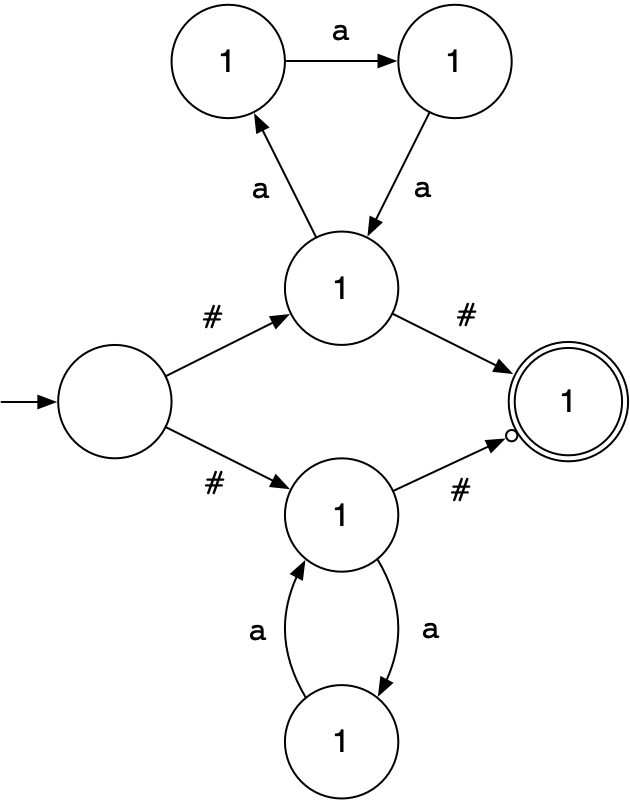

The transition that ends with a little circle is called *inhibitory*. If there's an inhibitory transition from state $q$ on symbol $a$ to state $r$, and state $q$ was on before reading $a$, then state $r$ cannot be on afterwards. So this NN accepts if the number of $\texttt{a}$'s is a multiple of 2 but *not* a multiple of 3.

The subset construction for converting an NFA to a DFA can be generalized to work on a neural network. The DFA states are still subsets of the states of the NN, and the DFA's start and accept states are the same; but the transition function is modified: let $\delta(\bar{q}, a)$ be the set of states that would be on if the states in $\bar{q}$ were on and the NN reads $a$.

Now imagine that we have a collection of strings that we want the NN to learn from. Some of the strings should be accepted and the rest should be rejected. We run the NN on all the strings and count the number of mistakes. We then want to modify the NN to minimize the number of mistakes.

To do this (and now we are definitely leaving Theory of Computing and entering Machine Learning), we replace all the integers with real numbers:

- For a state $q$, symbol $a$, and state $r$, the number of transitions from $q$ on $a$ to $r$ doesn't have to be a natural number; it can be any real number, positive or negative, called the *weight* of the transition.
- We don't need inhibitory transitions anymore, because we can simulate one with a transition with weight $-\infty$.
- The activation threshold can be any real number.
- A state is no longer just "on" or "off"; it has an *activation* between 0 (off) and 1 (on). Let's write the activation of state $q$ at time $i$ as $\text{activation}^{(i)}(q)$. Then
\begin{align*}
\text{activation}^{(i+1)}(r) &= \sigma\left(\sum_q \text{activation}^{(i)}(q) \times \text{weight}\left(q \xrightarrow{a} r\right) - \text{threshold}(r)\right) \\
\sigma(x) &= \frac{1}{1 + e^{-x}}
\end{align*}
where $\sigma$ is a smooth version of the "$\geq 0$" function that looks like this:
![Sigmoid function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png)

Finally, the number of mistakes is no longer a natural number, but, for each example string, it's the absolute difference between the correct answer (0 or 1) and the activation of the accept state. This is a continuous function of the weights and thresholds, and we can use calculus to minimize the number of mistakes by adjusting the weights and thresholds.